<a href="https://colab.research.google.com/github/Harshita0201/Machine_Learning/blob/main/2_4support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Transforming the aboive salaries y into 2D vertical array (as during feature scaling) standard scaler class expects a 2D array

In [5]:
y = y.reshape(len(y), 1) # reshaping to 2D array of (rows, col) here row=10 col=1 

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

We need to apply feature scaling to this model's dataset as this model does not follow any explicit equation that scales up all the features (like in case of simple linear regression, mulitple linear regression), therefore we do not have any coefficients or bias in the eqn that will scale the features and we have to do feature scaling

Note: We will not split the dataset into 2 parts-> training and test as the dataset is small. Hence features scaling will be done to whole dataset.

In the given dataset the salaries (y or DV) and position levels(X or IV) need to be scaled as we do not want  higher values of DV to dominate the position levels(X or IV) by or model




In [7]:
from sklearn.preprocessing import StandardScaler
#NOTE-> we will not use the same object to feature scale the y (DVs)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X) #feature scale the matrix of features X (IVs) through the sc_X object of StandardScaler class
y = sc_y.fit_transform(y) #feature scale the matrix of features y (DVs) through the sc_y object of StandardScaler class


In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


Tranformed X from -1 to +1 that is from 1 to 10 position levels





In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Transformed features from -3 to +3 i.e from salary 45000 to 1000000

## Training the SVR model on the whole dataset

In [10]:
#Accessing the SVR class from svm module under sklearn lib to build the SVR model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #creating instance/object of the SVR class and using the rbf kernel of  SVM
regressor.fit(X, y) #training the created model of our dataset features X and y(whole)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [13]:
#predicting the salary for a given position level of 6.5
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))) 
#since the model is applied to the transformed/scaled features X and y therefore for the new value too, we need to first transform it or scale it ->sc_X.transform()
#the above will return a value of salary which is scaled in the range of -3 to +3
#In order to get the salary in orginal scale i.e 45000 to 1000000, we need to aplly backward scaling using INVERSE TRANSFORM method->sc_y.inverse_transform()


array([170370.0204065])

## Visualising the SVR results

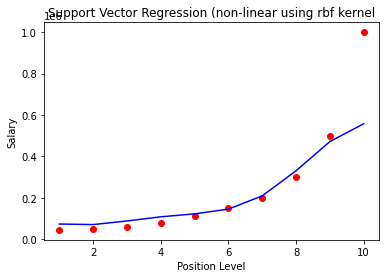

In [14]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red') #original data points of dataset 
# As X and y were transformed/scaled we need to transform them back to orignal vals by inverse_transform()
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)) , color='blue')
# plotting the predicted salaries 
plt.title("Support Vector Regression (non-linear using rbf kernel")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

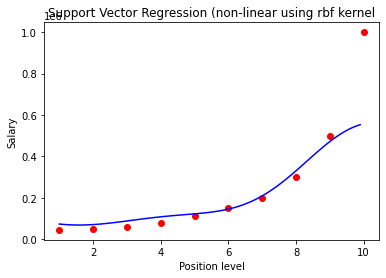

In [15]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1) #instead of taking scale of 1 on x-axis we take scale of 0.1 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Support Vector Regression (non-linear using rbf kernel')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()